No_hint - Mean: 7.50, Standard Deviation: 1.69
Hint3 - Mean: 7.90, Standard Deviation: 1.70
Hint2 - Mean: 7.90, Standard Deviation: 1.97
Hint1 - Mean: 8.40, Standard Deviation: 1.69
No_hint - Mean: 6.60, Standard Deviation: 1.69
Hint3 - Mean: 6.80, Standard Deviation: 1.17
Hint2 - Mean: 6.60, Standard Deviation: 2.11
Hint1 - Mean: 7.40, Standard Deviation: 1.91
No_hint - Mean: 6.40, Standard Deviation: 1.85
Hint3 - Mean: 7.00, Standard Deviation: 1.34
Hint2 - Mean: 6.60, Standard Deviation: 2.11
Hint1 - Mean: 7.60, Standard Deviation: 1.43


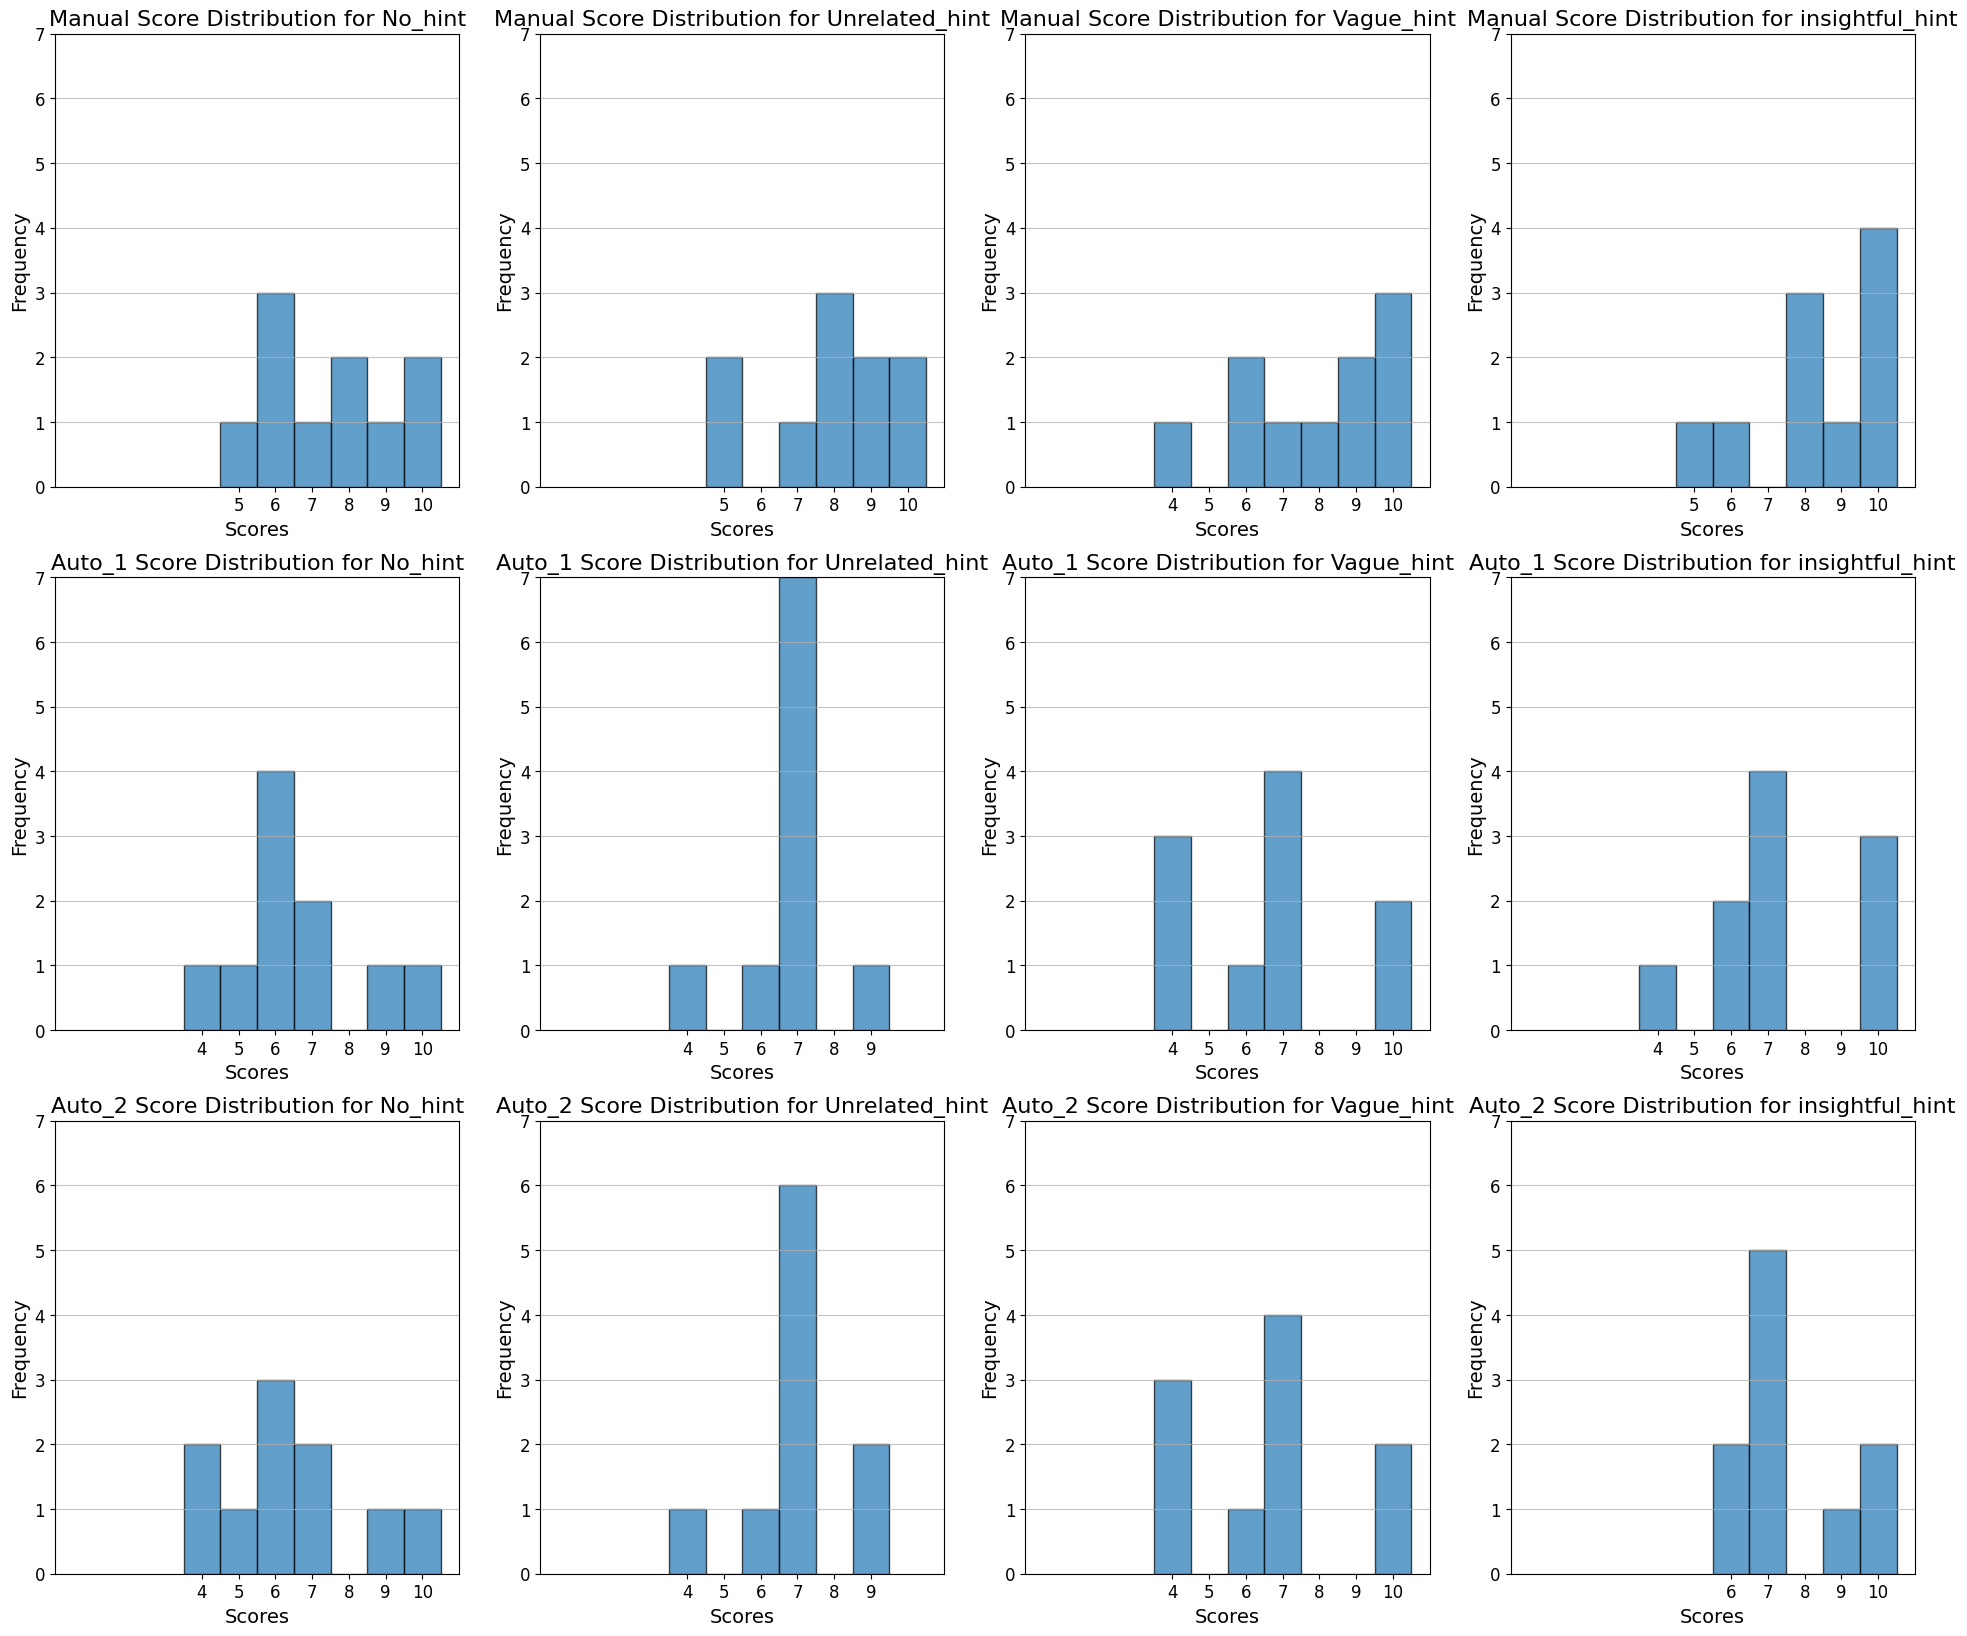

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_stats(data, key):
    # Extract the grades for the given key and convert them to float
    grades = [float(item[key]['grade']) for item in data if key in item]
    mean = np.mean(grades)
    std_dev = np.std(grades)
    return grades, mean, std_dev
def plot_distribution(data, category, grades, type, subplot_position, fig):
    # Configure the subplot at the specified position
    ax = fig.add_subplot(3, 4, subplot_position)
    
    bin_edges = np.arange(int(min(grades)), int(max(grades)) + 2) - 0.5
    ax.hist(grades, bins=bin_edges, alpha=0.7, edgecolor='black')
    ax.set_title(f'{type} Score Distribution for {category}', fontsize=16)
    ax.set_xlabel('Scores', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(axis='y', alpha=0.75)
    ax.set_xticks(np.arange(int(min(grades)), int(max(grades)) + 1))
    ax.set_xlim(0, 11)
    ax.set_ylim(0, 7)

def parse_and_plot(file_path, type, fig, start_pos):
    with open(file_path, 'r', encoding='utf-8') as file:
        quiz_data = json.load(file)
    
    categories = ['No_hint', 'Hint3', 'Hint2', 'Hint1']
    c_name= ['No_hint', 'Unrelated_hint', 'Vague_hint', 'Insightful_hint']
    stats = {}
    subplot_position = start_pos

    for x,category in enumerate(categories):
        grades, mean, std_dev = calculate_stats(quiz_data, category)
        stats[category] = {'mean': mean, 'std_dev': std_dev}
        plot_distribution(quiz_data, c_name[x], grades, type, subplot_position, fig)
        subplot_position += 1
        print(f"{category} - Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}")

    return stats

# Initialize a large figure for the 4x3 panel
fig = plt.figure(figsize=(24, 20))

# File paths
file_paths = ['graded_GPT4.json', 'auto_graded_GPT4.json', 'auto_graded_GPT4_2.json']
grade_name=['Manual', 'Auto_1', 'Auto_2']

# Parse and plot for each file
start_pos=1
for i, file_path in enumerate(file_paths):
    category_stats = parse_and_plot(file_path, grade_name[i], fig, start_pos)
    start_pos+=4

# Show the final panel of plots
plt.savefig('3x4_plot_panel.png')
plt.show()


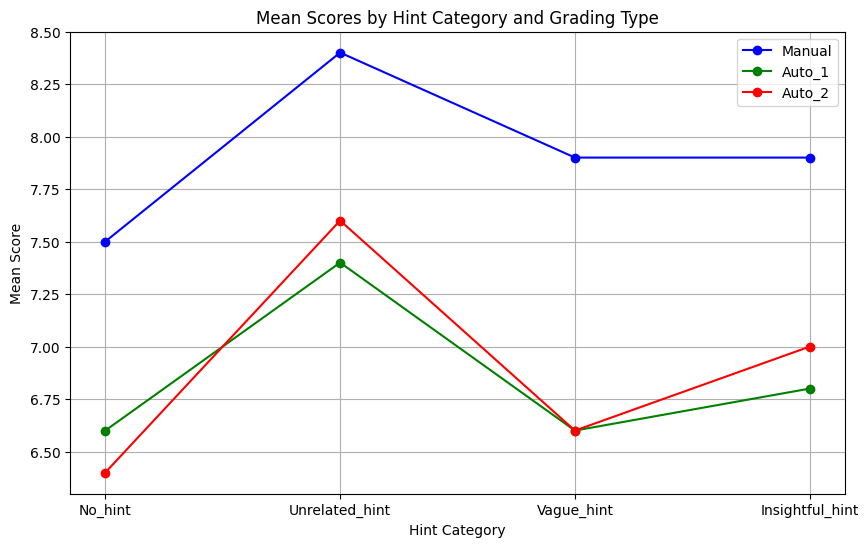

In [13]:
def plot_mean_scores(mean_scores, grading_types):
    # Set different colors for each type of grading
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
    categories = ['No_hint', 'Unrelated_hint', 'Vague_hint', 'Insightful_hint']

    plt.figure(figsize=(10, 6))
    for i, grading_type in enumerate(grading_types):
        means = [mean_scores[grading_type][category] for category in categories]
        plt.plot(categories, means, marker='o', color=colors[i % len(colors)], label=grading_type)
    
    plt.title('Mean Scores by Hint Category and Grading Type')
    plt.xlabel('Hint Category')
    plt.ylabel('Mean Score')
    plt.legend()
    plt.grid(True)
    plt.savefig('Mean Scores by Hint Category and Grading Type.png')
    plt.show()

def parse_and_plot(file_path, type):
    with open(file_path, 'r', encoding='utf-8') as file:
        quiz_data = json.load(file)
    
    categories = ['No_hint', 'Hint1', 'Hint2', 'Hint3']
    c_name= ['No_hint', 'Insightful_hint', 'Vague_hint', 'Unrelated_hint']
    stats = {}
    mean_scores = {}

    for i,category in enumerate(categories):
        grades, mean, std_dev = calculate_stats(quiz_data, category)
        stats[category] = {'mean': mean, 'std_dev': std_dev}
        mean_scores[c_name[i]] = mean

    return mean_scores

# File paths and types
grading_info = [
    ('graded_GPT4.json', 'Manual'),
    ('auto_graded_GPT4.json', 'Auto_1'),
    ('auto_graded_GPT4_2.json', 'Auto_2')
]

mean_scores_all = {}
for file_path, grading_type in grading_info:
    mean_scores = parse_and_plot(file_path, grading_type)
    mean_scores_all[grading_type] = mean_scores

# Plot mean scores
plot_mean_scores(mean_scores_all, [grading_type for _, grading_type in grading_info])